# Task 1

### Part 1

In [1]:
# Part 1

import csv
import math
import numpy as np

# Open and parse the csv files- we will be using simple python lists to store the MNIST data
trainInFile = open("train_in.csv") 
trainOutFile = open("train_out.csv")
train_in_reader = csv.reader(trainInFile)
train_out_reader = csv.reader(trainOutFile)

# 'ins' contains the all the image vectors and outs contains the corresponding digit labels
ins = [[float(i) for i in line] for line in train_in_reader]
outs = [int(i[0]) for i in train_out_reader]

# Initialise dictionary which will contain all the centers (means)
centers = [[], [], [], [], [], [], [], [], [], []]

# Calculating the center for each digit
indexNumber = 0
for numVector in ins:
    correspondingNumber = outs[indexNumber]
    if len(centers[correspondingNumber]) == 0:
        centers[correspondingNumber] = numVector
    else:
        for j in range(256):
            centers[correspondingNumber][j] = centers[correspondingNumber][j] + numVector[j]
    indexNumber += 1

for digit in range(10):
    centers[digit] = [i/len(centers[digit]) for i in centers[digit]]

# Distance matrix initialization
dist = [[0 for j in range(10)] for i in range(10)]

# Calculating the Euclidean distance between all the centers
for i in range(10):
    for j in range(10):
        squared = [(centers[i][k] - centers[j][k])**2 for k in range(256)]
        distance = round(math.sqrt(sum(squared)), 3)
        dist[i][j] = distance

for row in dist:
    print(" ".join(f"{round(item, 3):>7}" for item in row))

# The output printed below is the distance matrix

    0.0  15.294  10.537  10.146  11.116  10.502   9.101  11.476   10.52  11.085
 15.294     0.0  10.345   11.89    11.3   12.54  10.922  10.595   10.86  10.688
 10.537  10.345     0.0    5.51   5.341   5.893   4.927   6.058   4.852   5.587
 10.146   11.89    5.51     0.0   4.501   3.355    5.23   5.617   3.809   4.298
 11.116    11.3   5.341   4.501     0.0   3.704   4.885   4.982    3.93   3.101
 10.502   12.54   5.893   3.355   3.704     0.0   4.454   6.231   4.105   4.419
  9.101  10.922   4.927    5.23   4.885   4.454     0.0   6.828   4.973    5.76
 11.476  10.595   6.058   5.617   4.982   6.231   6.828     0.0    5.37   3.574
  10.52   10.86   4.852   3.809    3.93   4.105   4.973    5.37     0.0   3.385
 11.085  10.688   5.587   4.298   3.101   4.419    5.76   3.574   3.385     0.0


### Part 2

c:\Users\rajat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


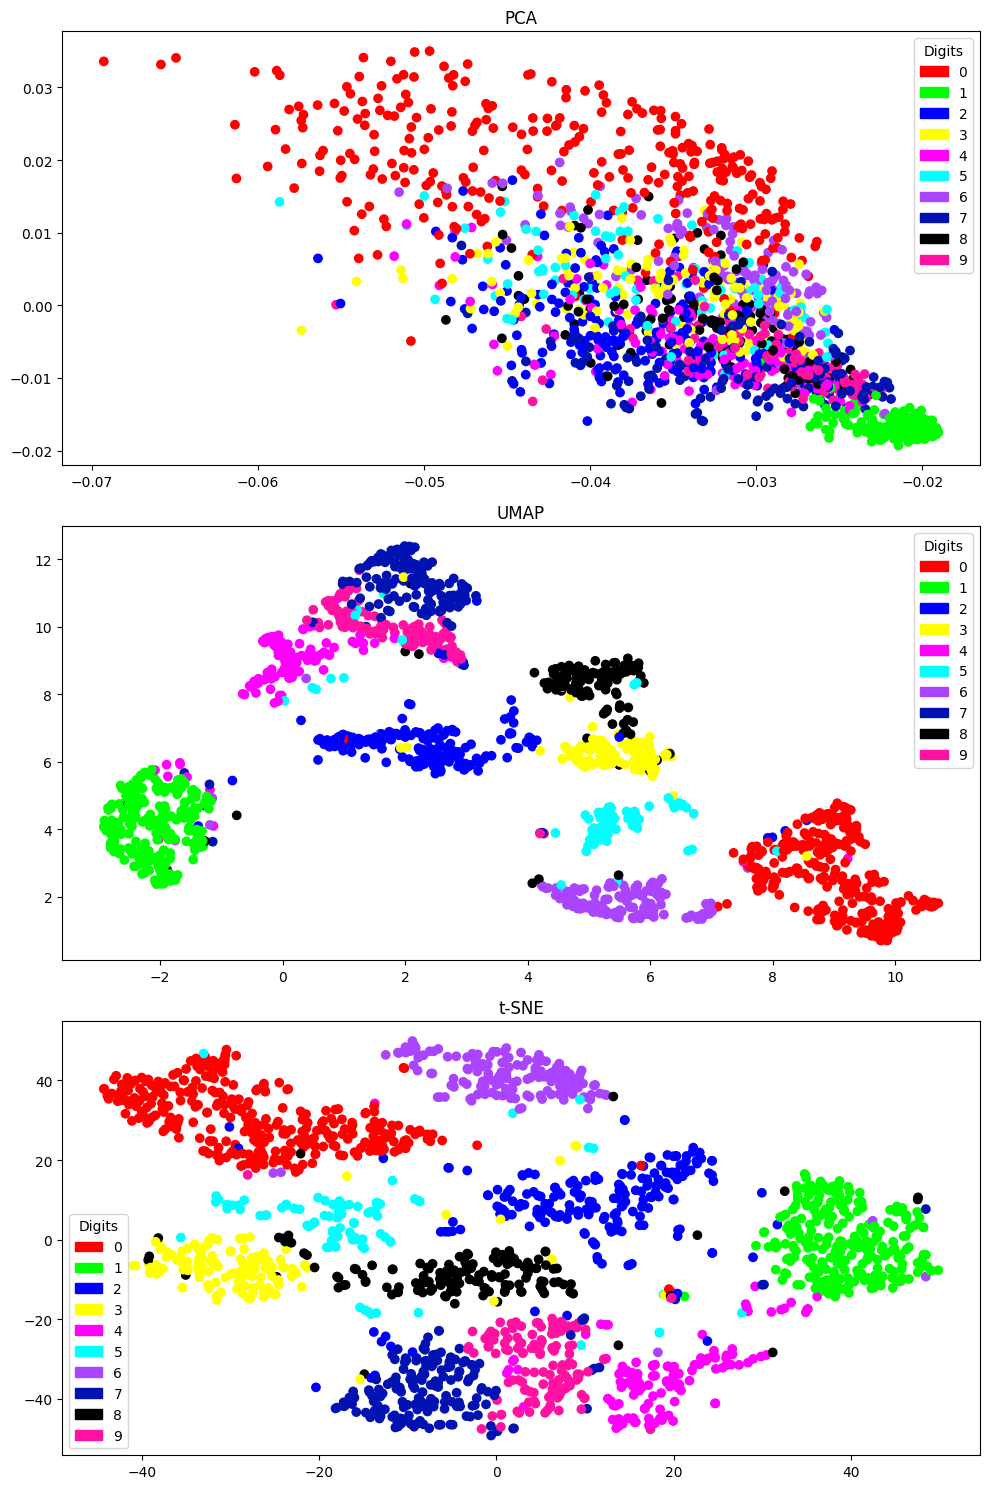

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import umap
from sklearn.manifold import TSNE

colorsIndex = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF", "#ab44fe", "#0012b1", "#000000", "#ff12a1"]
colors = [colorsIndex[i] for i in outs]

# Normalizing data using Min-Max Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(ins)

# PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

# UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)


'''
Filter PCA results
    I am doing this because originally, there were some outliers in the PCA plot where the values were beyond the normal range, thus resulting in a squished plot where you couldn't really see anything.
'''
mask = (Y[:, 0] <= 1)
Y_filtered = Y[mask]
colors_filtered = np.array(colors)[mask]
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot PCA results
axs[0].scatter(Y_filtered[:, 0], Y_filtered[:, 1], c=colors_filtered)
labels = list(set(outs))
handles = [mpatches.Patch(color=colorsIndex[label], label=str(label)) for label in labels]
axs[0].legend(handles=handles, title="Digits")
axs[0].set_title('PCA')

# Plot UMAP results
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=colors)
axs[1].legend(handles=handles, title="Digits")
axs[1].set_title('UMAP')

# Plot t-SNE results
axs[2].scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors)
axs[2].legend(handles=handles, title="Digits")
axs[2].set_title('t-SNE')

# Show the plots
plt.tight_layout()
plt.show()

### Part 3

In [3]:
conf_matrix_centers = [[0 for j in range(10)] for i in range(10)]

for vectorIndex in range(len(ins)):
    accuracy = 0
    vector = ins[vectorIndex]
    distances = [math.sqrt(sum([(vector[i] - centers[j][i])**2 for i in range(256)])) for j in range(10)]
    minIndex = distances.index(min(distances))
    if outs[vectorIndex] == minIndex:
        accuracy += 1
    else:
        conf_matrix_centers[outs[vectorIndex]][minIndex] += 1

print("Accuracy (training data): ", accuracy/len(ins)*100, "%")

testInFile = open("test_in.csv")
testOutFile = open("test_out.csv")

test_in_reader = csv.reader(testInFile)
test_out_reader = csv.reader(testOutFile)

test_ins = [[float(i) for i in line] for line in test_in_reader]
test_outs = [int(i[0]) for i in test_out_reader]

for vectorIndex in range(len(test_ins)):
    accuracy = 0
    vector = test_ins[vectorIndex]
    distances = [round(math.sqrt(sum([(vector[i] - centers[j][i])**2 for i in range(256)])), 4) for j in range(10)]
    minIndex = distances.index(min(distances))
    # print(distances)
    if test_outs[vectorIndex] == minIndex:
        accuracy += 1
    else:
        conf_matrix_centers[test_outs[vectorIndex]][minIndex] += 1

print("Accuracy (testing data): ", accuracy/len(test_ins)*100, "%")



Accuracy (training data):  0.05858230814294083 %
Accuracy (testing data):  0.1 %


### Part 4

In [5]:
k = 5
conf_matrix_knn = [[0 for i in range(10)] for j in range(10)]

## KNN using training data
accuracy_train = 0
for vectorIndex in range(len(ins)):
    kNearestIndices = [0 for i in range(k)]
    kNearestDistances = [100000 for i in range(k)]
    
    vector = ins[vectorIndex]
    
    for compIndex in range(len(ins)):
        if vectorIndex != compIndex:
            distance = math.sqrt(sum([(vector[i] - ins[compIndex][i])**2 for i in range(256)]))
            if distance < max(kNearestDistances):
                maxIndex = kNearestDistances.index(max(kNearestDistances))
                kNearestDistances[maxIndex] = distance
                kNearestIndices[maxIndex] = compIndex

    kNearestDigits = [outs[i] for i in kNearestIndices]
    count = [0 for i in range(10)]
    for digit in kNearestDigits:
        count[digit] += 1
    predictedDigit = count.index(max(count))
    if predictedDigit == outs[vectorIndex]:
        accuracy_train += 1
    else:
        conf_matrix_knn[outs[vectorIndex]][predictedDigit] += 1

print("Accuracy (training data): ", (accuracy_train/len(ins))*100, "%")

## KNN using testing data
accuracy_test = 0
for vectorIndex in range(len(test_ins)):
    kNearestIndices = [0 for i in range(k)]
    kNearestDistances = [100000 for i in range(k)]
    
    vector = test_ins[vectorIndex]
    
    for compIndex in range(len(ins)):
        distance = math.sqrt(sum([(vector[i] - ins[compIndex][i])**2 for i in range(256)]))
        if distance < max(kNearestDistances):
            maxIndex = kNearestDistances.index(max(kNearestDistances))
            kNearestDistances[maxIndex] = distance
            kNearestIndices[maxIndex] = compIndex

    kNearestDigits = [outs[i] for i in kNearestIndices]
    count = [0 for i in range(10)]
    for digit in kNearestDigits:
        count[digit] += 1
    predictedDigit = count.index(max(count))
    if predictedDigit == test_outs[vectorIndex]:
        accuracy_test += 1
    else:
        conf_matrix_centers[test_outs[vectorIndex]][predictedDigit] += 1

print("Accuracy (testing data): ", (accuracy_test/len(test_ins))*100, "%")

Accuracy (training data):  94.14176918570591 %
Accuracy (testing data):  90.7 %


In [9]:
digitcounts = [0 for i in range(10)]

for i in range(len(ins)):
    digitcounts[outs[i]] += 1

for i in range(len(test_outs)):
    digitcounts[test_outs[i]] += 1


print("Confusion matrix for nearest center classifier:")
i = 0
for row in conf_matrix_centers:
    print(" ".join(f"{round(item/digitcounts[i]*100, 3):>6}%" for item in row))
    i += 1

print()

print("Confusion matrix for KNN:")
i = 0
for row in conf_matrix_knn:
    print(" ".join(f"{round(item/digitcounts[i]*100, 3):>6}%" for item in row))
    i += 1

Confusion matrix for nearest center classifier:
   0.0%    0.0%   2.21%  2.578%  1.473%  1.657%  11.05%  0.921%  1.289%  0.368%
   0.0%    0.0%    0.0%    0.0%    0.0%    0.0%  0.536%    0.0%    0.0%    0.0%
  2.97%   2.97%    0.0%   3.63%   1.32%    0.0%   2.31%   3.96%  5.941%    0.0%
 1.429%  1.905%  4.286%    0.0%    0.0%  0.952%  0.476%  7.619%   3.81%  1.905%
   0.0% 11.538%  5.769%    0.0%    0.0%    0.0%  1.923% 10.577%    0.0% 22.596%
 9.091%  2.098%  2.797% 33.566%  6.294%    0.0% 29.371%  7.692%  6.294%  4.895%
  2.49%  5.394%  4.149%    0.0%  0.415%    0.0%    0.0%    0.0%    0.0%    0.0%
   0.0%  6.522%    0.0%  0.435%  2.174%    0.0%    0.0%    0.0%  0.435%  1.739%
 2.119%  7.203%  2.542%  7.627%    0.0%    0.0%  1.271%  4.661%    0.0%  2.542%
 0.455% 13.182%  0.455%    0.0%  1.818%    0.0%    0.0% 41.364%  0.909%    0.0%

Confusion matrix for KNN:
   0.0%    0.0%  0.368%    0.0%    0.0%    0.0%    0.0%    0.0%    0.0%    0.0%
   0.0%    0.0%  0.268%    0.0%    0.0%    0.

# Task 2

Updating weights for sample 0 at epoch 0
Updating weights for sample 1 at epoch 0
Updating weights for sample 3 at epoch 0
Updating weights for sample 4 at epoch 0
Updating weights for sample 5 at epoch 0
Updating weights for sample 6 at epoch 0
Updating weights for sample 7 at epoch 0
Updating weights for sample 8 at epoch 0
Updating weights for sample 9 at epoch 0
Updating weights for sample 10 at epoch 0
Updating weights for sample 11 at epoch 0
Updating weights for sample 12 at epoch 0
Updating weights for sample 13 at epoch 0
Updating weights for sample 14 at epoch 0
Updating weights for sample 15 at epoch 0
Updating weights for sample 16 at epoch 0
Updating weights for sample 17 at epoch 0
Updating weights for sample 18 at epoch 0
Updating weights for sample 19 at epoch 0
Updating weights for sample 20 at epoch 0
Updating weights for sample 21 at epoch 0
Updating weights for sample 22 at epoch 0
Updating weights for sample 23 at epoch 0
Updating weights for sample 24 at epoch 0
U

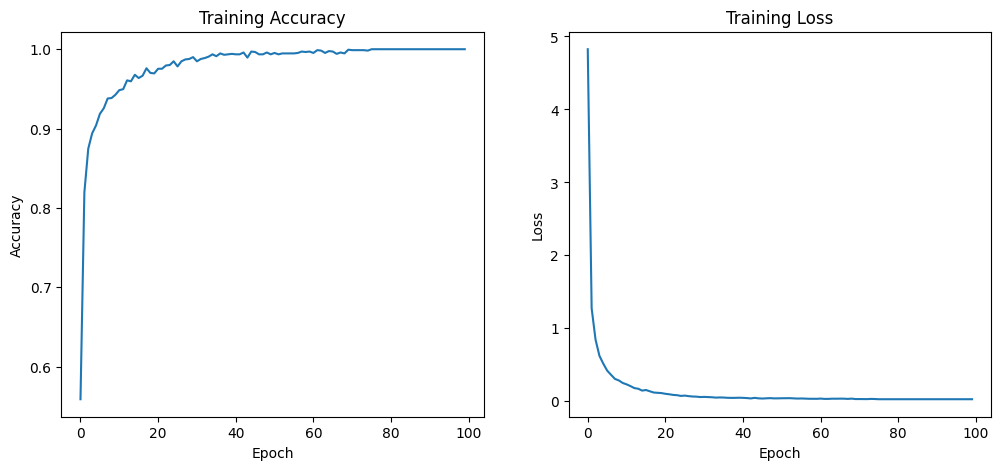

Test Accuracy = 0.83


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training and test data
train_in = np.loadtxt('train_in.csv', delimiter=',')
train_out = np.loadtxt('train_out.csv', delimiter=',').astype(int)
test_in = np.loadtxt('test_in.csv', delimiter=',')
test_out = np.loadtxt('test_out.csv', delimiter=',').astype(int)

# Add bias to the input (both train and test)
train_in = np.hstack((train_in, np.ones((train_in.shape[0], 1))))
test_in = np.hstack((test_in, np.ones((test_in.shape[0], 1))))

# Initialize weights (257 features including bias, 10 classes)
W = np.random.randn(257, 10)

# Define learning rate and number of epochs
alpha = 0.01
num_epochs = 100

# Softmax function to convert logits to probabilities
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Numerical stability
    return exp_z / exp_z.sum(axis=0)

# Cross-entropy loss
def cross_entropy_loss(probs, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(probs[range(m), y_true])
    return np.sum(log_likelihood) / m

# Store accuracy and loss values for plotting
accuracies = []
losses = []

# Perceptron training loop with softmax and cross-entropy
for epoch in range(num_epochs):
    correct = 0
    total_loss = 0

    for i in range(train_in.shape[0]):
        x_i = train_in[i, :]  # Input vector (with bias)
        y_i = train_out[i]    # True label

        # Compute dot product between x_i and weight matrix (logits)
        scores = np.dot(x_i, W)

        # Apply softmax to get probabilities
        probs = softmax(scores)

        # Predict the class with the highest probability
        y_pred = np.argmax(probs)

        # Update weights if prediction is incorrect
        if y_pred != y_i:
            print(f"Updating weights for sample {i} at epoch {epoch}")  # Debugging print statement
            W[:, y_i] += alpha * x_i  # Update correct class
            W[:, y_pred] -= alpha * x_i  # Update incorrect class
        else:
            correct += 1

        # Calculate cross-entropy loss for the current sample
        total_loss += -np.log(probs[y_i])

    # Calculate accuracy for this epoch
    accuracy = correct / train_in.shape[0]
    accuracies.append(accuracy)
    losses.append(total_loss / train_in.shape[0])

    # Print results for the current epoch
    print(f'Epoch {epoch}: Accuracy = {accuracy:.2f}, Loss = {total_loss:.4f}')

# Plot accuracy and loss over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# Testing the model on the test set
correct = 0
for i in range(test_in.shape[0]):
    x_i = test_in[i, :]  # Input vector (with bias)
    y_i = test_out[i]    # True label

    # Compute dot product between x_i and weight matrix
    scores = np.dot(x_i, W)

    # Apply softmax
    probs = softmax(scores)

    # Predict the class with the highest probability
    y_pred = np.argmax(probs)

    if y_pred == y_i:
        correct += 1

# Calculate accuracy on the test set
test_accuracy = correct / test_in.shape[0]
print(f'Test Accuracy = {test_accuracy:.2f}')
